# Mean and CI of the average cycle time for varying and dynamic arrivals

complete
1830
complete_reversed
1752
complete_parallel
1819


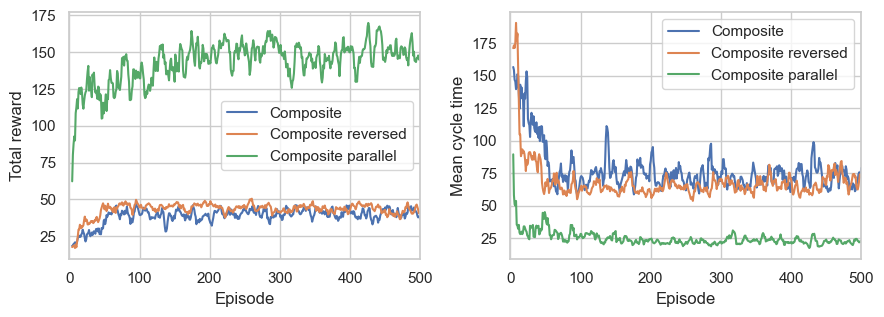

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")


configs = ['complete', 'complete_reversed', 'complete_parallel']#['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']
labels = ['Composite', 'Composite reversed', 'Composite parallel']
arrival_rates = [0.5]#[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 'pattern']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.33))
for i, config in enumerate(configs):
    print(config)
    for arrival_rate in arrival_rates:
        data = pd.read_csv(f'tmp_revision/{config}_{arrival_rate}/results_{config}.txt')
        print(len(data))
        
        # Calculate moving averages
        data['total_reward_ma'] = data['total_reward'].rolling(window=5).mean()
        data['mean_cycle_time_ma'] = data['mean_cycle_time'].rolling(window=5).mean()
        
        # Plotting
        
        axes[0].plot(data.index, data['total_reward_ma'], label={labels[i]})
        axes[1].plot(data.index, data['mean_cycle_time_ma'], label={labels[i]})
        
        # Set titles and labels
        #axes[0].set_title(f'Total Reward vs. Episode for {config}, Arrival Rate: {arrival_rate}')
        axes[0].set_xlabel('Episode')
        axes[0].set_ylabel('Total reward')
        
        #axes[1].set_title(f'Mean Cycle Time vs. Episode for {config}, Arrival Rate: {arrival_rate}')
        axes[1].set_xlabel('Episode')
        axes[1].set_ylabel('Mean cycle time')
        
        # Show legend
        axes[0].legend()
        axes[1].legend()
        
        # if 'complete' not in config:
        axes[0].set_xlim(0, 500)
        axes[1].set_xlim(0, 500)
        plt.tight_layout()

plt.savefig(f'./figures/training_curves.pdf')

In [2]:
import pickle as pkl
a= pkl.load(open('results_svfa/training_complete_rate_0.5.pkl', 'rb'))
a

[69.04909346823612,
 71.16072468089494,
 82.55089032896366,
 92.43089678959892,
 62.29932459145732,
 90.57325880316314,
 71.57697402843617,
 87.27953665463231,
 59.94796278935822,
 96.0221973309684,
 61.531218238860106,
 75.7004194531612,
 77.85920630127002,
 58.14488839249286,
 64.81960403467943,
 87.4778791582803,
 67.62321975696709,
 55.68797358552296,
 82.09064832289272,
 58.15362907414981]